## <b>This is part of submissions for one of the coursework<b><br> API Module

In [4]:
import pandas as pd 
import time
import requests
from bs4 import BeautifulSoup
import json
import bs4
import random
import requests
from pprint import pprint 
import matplotlib.pyplot as plt

#### Getting the names of the 'businesses' from Fusion API

In [6]:
YELP_TOKEN = "XVw8PC6lf8P8uSJUM6wHXI2yHblKm020t0TkZSOGCI74Cs-2ZGdulGsva1r2ILIQOmpg2aVTCSbNsRI2xpjkj1J0LtErU-8Wj02Yu4TFGXUYb8Ryee1IAjuuO8sCXnYx"

In [7]:
url = "https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50"
businesses = []
for i in range(0,1000,50):
    r = requests.get(url+ "&offset="+str(i), headers={"Authorization": "Bearer %s" % YELP_TOKEN})
    businesses.extend(json.loads(r.content)['businesses'])

In [8]:
businesses

[{'id': 'r_BrIgzYcwo1NAuG9dLbpg',
  'alias': 'pai-northern-thai-kitchen-toronto-5',
  'name': 'Pai Northern Thai Kitchen',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/t-g4d_vCAgZH_6pCqjaYWQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
  'review_count': 2771,
  'categories': [{'alias': 'thai', 'title': 'Thai'}],
  'rating': 4.5,
  'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '18 Duncan Street',
   'address2': '',
   'address3': '',
   'city': 'Toronto',
   'zip_code': 'M5H 3G8',
   'country': 'CA',
   'state': 'ON',
   'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada']},
  'phone': '+14169014724',
  'display_phone': '+1 416-901-4724',
  'distance': 3009.3347434869856},
 {'id': 'iGEvDk

In [13]:
##Storing all 1000 URLs in a list
urls = [a['url'] for a in businesses][:1000]

In [14]:
urls

['https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
 'https://www.yelp.com/biz/seven-lives-tacos-y-mariscos-toronto?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
 'https://www.yelp.com/biz/kinka-izakaya-original-toronto?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
 'https://www.yelp.com/biz/banh-mi-boys-toronto?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
 'https://www.yelp.com/biz/richmond-station-toronto?adjust_creative=DWzxoTZ2OBjB-TlfbWVufA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=DWzxoTZ2OBjB-TlfbWVufA',
 'https://www.yelp.com/biz/byblos-toronto-2?a

In [15]:
## Number of urls stored in the URLs list
len(urls)

1000

### Scraping first page of first 150 restaurant businesses from yelp

In [213]:
#creating an empty output list, which will be appended later
output = []
#from the list of 1000 urls selecting first 299, which will be scraped
for url in urls[:150]:
    ##Using requests library to get the page of each restaurant
    page = requests.get(url)
    ##Using beautiful soup library to genearate soup object
    soup = BeautifulSoup(page.content, 'html.parser')
    #Extracting raw reviews data in string format
    raw_data = soup.find_all('script')[7].text
    #converting raw data to dictionary using json 
    json_data = json.loads(raw_data)
    #Listing reviews from the first page of the restaurant
    reviews = [review['description'] for review in json_data['review']]
    # Listing review rating from first page of the restaurant
    ratings = [rating['reviewRating']['ratingValue'] for rating in json_data['review']]
    #Adding a lag in each iteration of data extraction since using more than 300 iterations without any lag got my IP address blocked 
    time.sleep(random.randint(10,20))
    # Appending the list of outputs
    output.extend([[review,rating] for review,rating in zip(reviews,ratings)])

In [214]:
## writing the extracted reviews and ratings in data.json file
with open("data.json", "x") as myfile:
    myfile.write(json.dumps(output))

In [230]:
output

[["Wow there's definitely a reason why this is the most reviewed restaurant in Toronto. Definitely call in with a reservation to this place because it was packedddddd. First of all the place was HUGE. When you walk in it looks like a very small shop but don't be fooled. The vibe felt extremely homey and vintage. I loved it.\n\nI ordered the Tea Mac cocktail which was basically an alcoholic Thai tea and it was amazing. I could barely taste the alcohol it was so good. I also ordered the Tom yum soup which was fantastic. The portion was smaller but it was the perfect amount of spice. For the entree I got the Khao Soi, I was blown away. I typically don't love curries but this was a very light chicken coconut curry with noodles. It was soooo good. And for dessert we got the egg custard sticky rice. Probably some of the best Thai food I've ever had in my life.",
  5],
 ["Food is really good, I can't think of a better Thai restaurant in Toronto. Very reasonable prices.\n\nI've been here a cou

### Model

In [16]:
# read file
with open('data.json', 'r') as myfile:
    data=myfile.read()

In [21]:
raw_reviews = json.loads(data)

In [22]:
review_features = [(x.split(' '), 'positive' if y > 3 else 'negative') for (x, y) in raw_reviews]
review_features

[(['Wow',
   "there's",
   'definitely',
   'a',
   'reason',
   'why',
   'this',
   'is',
   'the',
   'most',
   'reviewed',
   'restaurant',
   'in',
   'Toronto.',
   'Definitely',
   'call',
   'in',
   'with',
   'a',
   'reservation',
   'to',
   'this',
   'place',
   'because',
   'it',
   'was',
   'packedddddd.',
   'First',
   'of',
   'all',
   'the',
   'place',
   'was',
   'HUGE.',
   'When',
   'you',
   'walk',
   'in',
   'it',
   'looks',
   'like',
   'a',
   'very',
   'small',
   'shop',
   'but',
   "don't",
   'be',
   'fooled.',
   'The',
   'vibe',
   'felt',
   'extremely',
   'homey',
   'and',
   'vintage.',
   'I',
   'loved',
   'it.\n\nI',
   'ordered',
   'the',
   'Tea',
   'Mac',
   'cocktail',
   'which',
   'was',
   'basically',
   'an',
   'alcoholic',
   'Thai',
   'tea',
   'and',
   'it',
   'was',
   'amazing.',
   'I',
   'could',
   'barely',
   'taste',
   'the',
   'alcohol',
   'it',
   'was',
   'so',
   'good.',
   'I',
   'also',
   

In [23]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

In [24]:
random.shuffle(review_features)
training_docs = review_features[:2500]
test_docs = review_features[2500:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 2500, Testing: 500


In [25]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['I',
 'went',
 'to',
 'Tsujiri',
 'last',
 'weekend',
 'to',
 'try',
 'their',
 'Monaka',
 'Kuromitsu',
 'Sundae.',
 'I',
 'know',
 'this',
 'will',
 'sound',
 'stupid',
 'but',
 'it',
 'was',
 'too',
 'much',
 'matcha',
 'for',
 'me.',
 'Too',
 'extra.',
 'I',
 'like',
 'matcha',
 'but',
 'this',
 'was',
 'very',
 'strong.',
 'I',
 "wouldn't",
 'get_NEG',
 'this_NEG',
 'again._NEG',
 '\nPlace_NEG',
 'is_NEG',
 'cute._NEG',
 'Seating_NEG',
 'for_NEG',
 '8-10_NEG',
 'people_NEG',
 'only._NEG',
 'Exceptional',
 'Thai',
 'food.',
 'Whenever',
 'I',
 'am',
 'craving',
 'pad',
 'thai',
 'or',
 'cashew',
 'chicken,',
 'this',
 'place',
 'hits',
 'the',
 'spot!\n\nMany',
 'Thai',
 'restaurants',
 'have',
 'popped',
 'up',
 'Downtown',
 'but',
 'nothing',
 'beats_NEG',
 'Sukhothai._NEG',
 "It's",
 'pretty',
 'expensive',
 'and',
 "it's",
 'in',
 'the',
 'lower',
 'level',
 'of',
 'a',
 'mall',
 'so',
 'that',
 'made',
 'it',
 'a',
 'bit',
 'difficult',
 'to',
 'find.',
 '',
 'As',
 'far',
 'a

In [26]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [27]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [28]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.788
F-measure [negative]: 0.4479166666666667
F-measure [positive]: 0.8688118811881188
Precision [negative]: 0.43
Precision [positive]: 0.8775
Recall [negative]: 0.4673913043478261
Recall [positive]: 0.8602941176470589


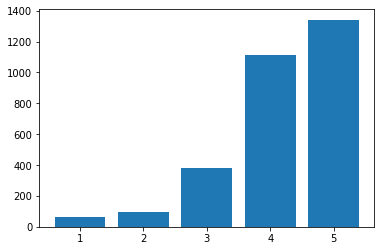

In [30]:
from collections import defaultdict

c = defaultdict(int)
for x in raw_reviews:
    c[x[1]] += 1

plt.bar(c.keys(), c.values());